Final Cost: 0.22910578679491786
Final Weights:
  Bias (w0): 0.32395464815235225
  Weight for X1 (w1): 2.386136630115652
  Weight for X2 (w2): -2.494624667653989


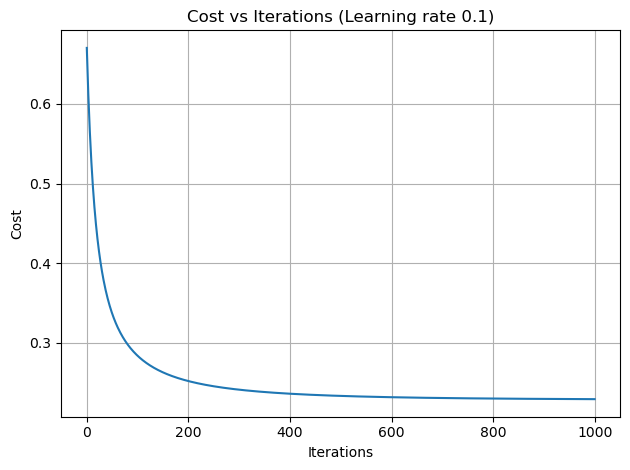

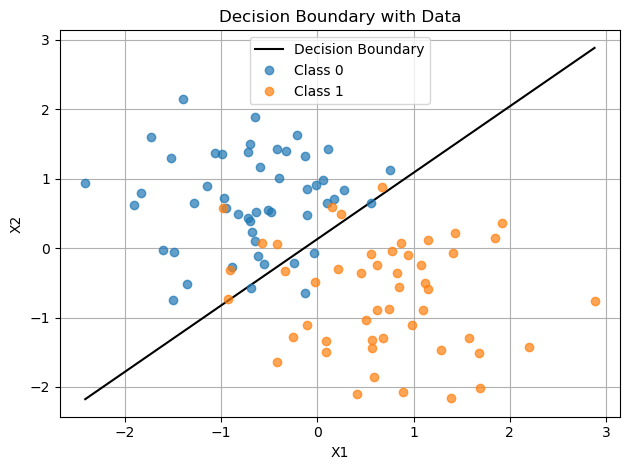

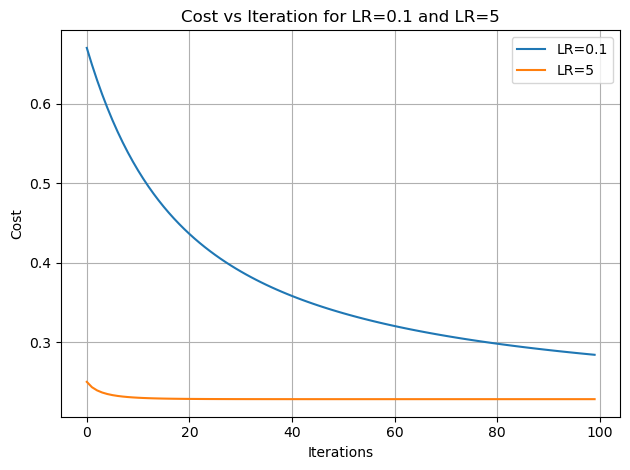

Confusion Matrix:
[[TN=45  FP=5]
 [FN=8  TP=42]]
Accuracy: 0.8700 (87.00%)
Precision: 0.8936
Recall: 0.8400
F1 Score: 0.8660


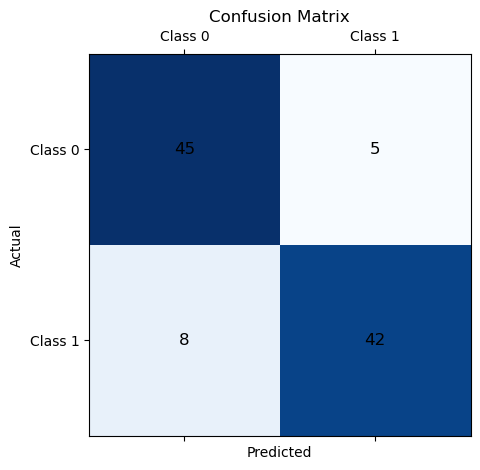

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load data (ensure header=None to keep all 100 values)
X_df = pd.read_csv("logisticX.csv", header=None)
y_df = pd.read_csv("logisticY.csv", header=None)

# Convert to numpy arrays
X = X_df.to_numpy()
y = y_df.to_numpy().flatten()

# Normalize features (mean = 0, std = 1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Shape: (100, 3)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = -1/m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, epochs):
    cost_history = []
    for _ in range(epochs):
        h = sigmoid(X @ weights)
        gradient = (X.T @ (h - y)) / len(y)
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
    return weights, cost_history

# Prediction function
def predict(X, weights):
    return sigmoid(X @ weights) >= 0.5

# Train model
initial_weights = np.zeros(X.shape[1])
learning_rate = 0.1
epochs = 1000
final_weights, cost_history = gradient_descent(X, y, initial_weights, learning_rate, epochs)

# Final predictions
y_pred = predict(X, final_weights).astype(int)

# Q1: Cost function value and weights after convergence
print("Final Cost:", cost_history[-1])
print("Final Weights:")
print(f"  Bias (w0): {final_weights[0]}")
print(f"  Weight for X1 (w1): {final_weights[1]}")
print(f"  Weight for X2 (w2): {final_weights[2]}")

# Q2: Plot Cost vs Iteration
plt.plot(range(epochs), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning rate 0.1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q3: Plot dataset with decision boundary (no scatter)
x1_vals = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x2_vals = -(final_weights[0] + final_weights[1] * x1_vals) / final_weights[2]

plt.plot(x1_vals, x2_vals, color='black', label='Decision Boundary')
plt.plot(X[y==0][:,1], X[y==0][:,2], 'o', label='Class 0', alpha=0.7)
plt.plot(X[y==1][:,1], X[y==1][:,2], 'o', label='Class 1', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary with Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Q4: Cost comparison for learning rate = 0.1 and 5 (100 iterations only)
def train_for_plot(lr):
    _, costs = gradient_descent(X, y, np.zeros(X.shape[1]), lr, 100)
    return costs

costs_lr_01 = train_for_plot(0.1)
costs_lr_5 = train_for_plot(5)

plt.plot(range(100), costs_lr_01, label='LR=0.1')
plt.plot(range(100), costs_lr_5, label='LR=5')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration for LR=0.1 and LR=5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Q5: Confusion matrix and metrics
TP = np.sum((y == 1) & (y_pred == 1))
TN = np.sum((y == 0) & (y_pred == 0))
FP = np.sum((y == 0) & (y_pred == 1))
FN = np.sum((y == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(y)
precision = TP / (TP + FP) if (TP + FP) else 0
recall = TP / (TP + FN) if (TP + FN) else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

# Print metrics
print(f"Confusion Matrix:\n[[TN={TN}  FP={FP}]\n [FN={FN}  TP={TP}]]")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = np.array([[TN, FP], [FN, TP]])
fig, ax = plt.subplots()
ax.matshow(cm, cmap='Blues')
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val}", ha='center', va='center', fontsize=12)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(['', 'Class 0', 'Class 1'])
ax.set_yticklabels(['', 'Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
